Import modules needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the CSV file provided to get the dataset and sort the data.

In [2]:
dataset = pd.read_csv('Task1_dataset_PolynomialRegression.csv')
dataset_sorted = dataset.sort_values('x') # sort by x values in ascending order 
print(dataset_sorted)

    Unnamed: 0         x           y
16          16 -4.760181 -162.084241
10          10 -4.701238 -155.192926
8            8 -4.485328 -125.275943
6            6 -3.744147  -72.556875
7            7 -2.927571  -29.934683
18          18 -2.407476  -15.690391
13          13 -2.215127    2.772584
2            2 -2.090953  -10.895881
19          19 -0.848988   -2.259106
9            9 -0.591902    1.586948
11          11 -0.431668    0.737940
3            3  0.108276   -1.580098
0            0  0.507979    2.238321
17          17  0.588541  -15.192640
15          15  0.908628   -7.818825
12          12  1.491440   -3.133557
14          14  1.762549  -13.629526
1            1  2.081478  -13.104269
4            4  3.929470    9.174928
5            5  3.962931    3.237086


# Section 1.2: Implementation of Polynomial Regression
Implement functions.

In [25]:
def getPolDataMatrix(features, degree):
    '''
    Do the polynomial feature expansion up to a certain degree for original features.

    :param features: original features
    :param degree: a certain degree of a polynomial
    :returns: a data matrix for a polynomial
    '''

    dataMatrix = []
    
    for i in range(degree + 1): # range: [0, degree + 1)
        dataMatrix.append(features ** i)
    
    return np.mat(dataMatrix).transpose()


def pol_regression(features_train, y_train, degree):
    '''
    Regress a polynomial of a certain degree.

    :param features_train: training input values given as a 1-D NumPy array
    :param y_train: training output values given as a 1-D NumPy array
    :param degree: a certain degree of a polynomial
    :returns: a NumPy array of the parameters of a polynomial
    '''

    x = getPolDataMatrix(features_train, degree) # do the polynomial feature expansion
    xTx = x.transpose().dot(x)
    y = y_train.reshape((len(y_train), 1))
    parameters = np.linalg.solve(xTx, x.transpose().dot(y)) # the least-squares solution
    
    return parameters

Get the training input and output values from the sorted dataset.<br />
Regress a polynomial of the following degrees: 0, 1, 2, 3, 5, 10.<br />
Plot the resulting polynomial in the range of [-5, 5] for the inputs x.

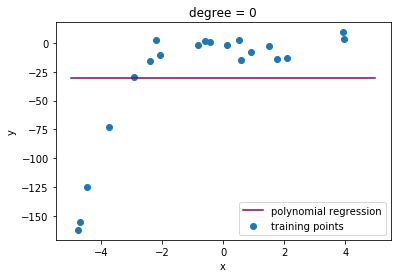

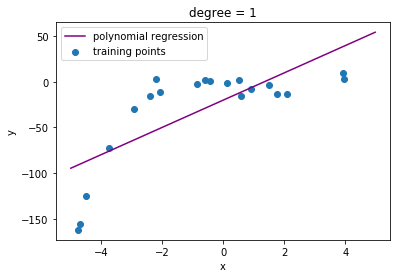

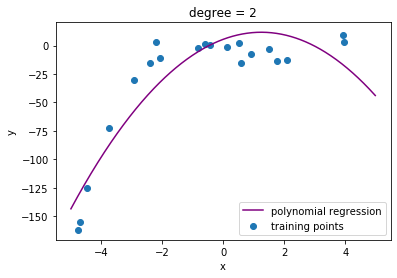

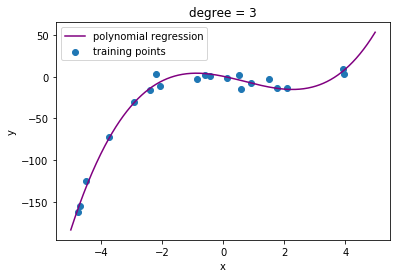

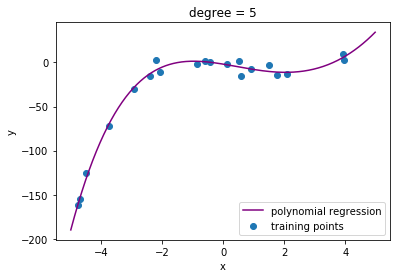

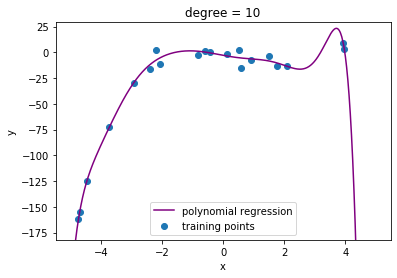

In [32]:
x_train = np.array(dataset_sorted['x'])
y_train = np.array(dataset_sorted['y'])

for degree in [0, 1, 2, 3, 5, 10]:
    parameters = pol_regression(x_train, y_train, degree) # regress a polynomial of a certain degree
    x_range = [(-5 + count * 0.02) for count in range(int((5 - (-5)) // 0.02) + 1)] # the range of x: [-5, 5]
    dataMatrix = getPolDataMatrix(np.array(x_range), degree) # do the polynomial feature expansion
    y_pred = dataMatrix.dot(parameters)
    
    if degree == 10:
        plt.ylim(min(y_train) - 20, max(y_train) + 20)
    
    # plot the resulting polynomial
    plt.title('degree = {}'.format(degree))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x_train, y_train, label = 'training points')
    plt.plot(x_range, y_pred, 'purple', label = 'polynomial regression')
    plt.legend()
    plt.show()

# Section 1.3: Evaluation
Implement a function.

In [5]:
def eval_pol_regression(parameters, x, y, degree):
    '''
    Evaluate the performance of a polynomial.

    :param parameters: the parameters of a polynomial
    :param x: input values given as a 1-D NumPy array
    :param y: output values given as a 1-D NumPy array
    :param degree: a certain degree of a polynomial
    :returns: the root mean squared error (RMSE) of a polynomial
    '''

    dataMatrix = getPolDataMatrix(x, degree) # do the polynomial feature expansion
    y_pred = np.array(dataMatrix.dot(parameters))
    y_pred = y_pred.reshape((len(y_pred))) # reshape the 2-D NumPy array y_pred to a 1-D NumPy array
    rmse = np.sqrt(np.mean(np.power(y - y_pred, 2)))

    return rmse

Use a random shuffle to pick 70% for the training set and the rest for the test set.<br />
Train the polynomial functions in Section 1.2 with degrees 0, 1, 2, 3, 5, and 10.<br />
Evaluate the training set RMSE and the test set RMSE of all the given degrees.<br />
Plot the resulting polynomial in the range of [-5, 5] for the inputs x.

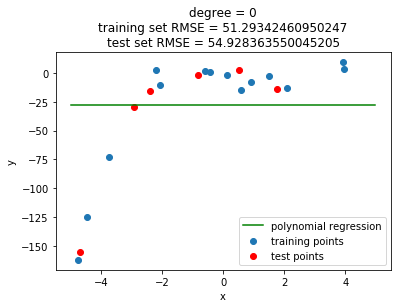

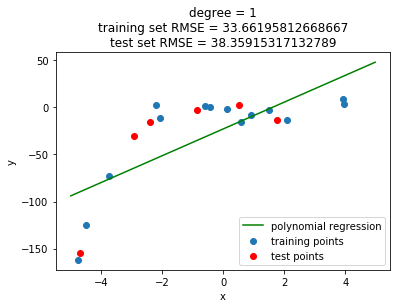

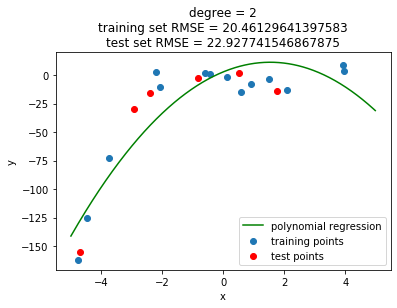

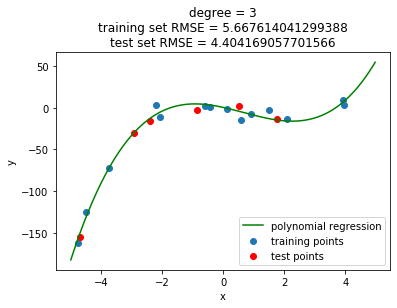

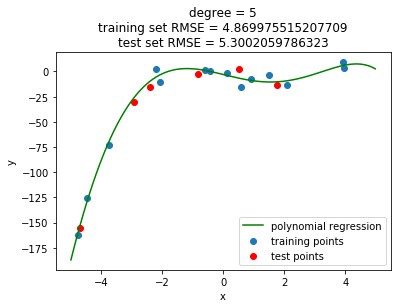

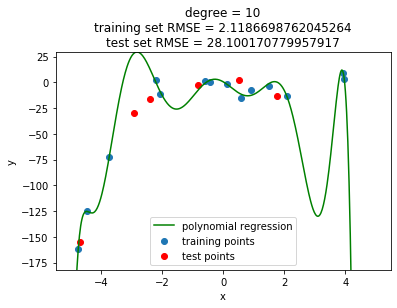

In [43]:
trainingSet = dataset_sorted.sample(frac = 0.7)
testSet = dataset_sorted[~dataset_sorted.index.isin(trainingSet.index)]
x_train = np.array(trainingSet['x'])
y_train = np.array(trainingSet['y'])
x_test = np.array(testSet['x'])
y_test = np.array(testSet['y'])
degreeList = [0, 1, 2, 3, 5, 10]
rmseList_train = []
rmseList_test = []

for degree in degreeList:
    parameters = pol_regression(x_train, y_train, degree) # regress a polynomial of a certain degree
    x_range = [(-5 + count * 0.02) for count in range(int((5 - (-5)) // 0.02) + 1)] # the range of x: [-5, 5]
    dataMatrix = getPolDataMatrix(np.array(x_range), degree) # do the polynomial feature expansion
    y_pred = dataMatrix.dot(parameters)
    
    rmse_train = eval_pol_regression(parameters, x_train, y_train, degree) # evaluate the training set RMSE
    rmse_test = eval_pol_regression(parameters, x_test, y_test, degree) # evaluate the test set RMSE
    rmseList_train.append(rmse_train)
    rmseList_test.append(rmse_test)
    
    if degree == 10:
        plt.ylim(min(dataset_sorted['y']) - 20, max(dataset_sorted['y']) + 20)
    
    # plot the resulting polynomial
    plt.title('degree = {}\ntraining set RMSE = {}\ntest set RMSE = {}'.format(degree, rmse_train, rmse_test))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x_train, y_train, label = 'training points')
    plt.scatter(x_test, y_test, c = 'red', label = 'test points')
    plt.plot(x_range, y_pred, 'green', label = 'polynomial regression')
    plt.legend()
    plt.show()

Plot both RMSE values using the degree of the polynomial as x-axis of the plot.

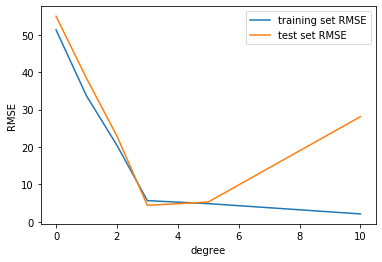

In [44]:
# plot both RMSE values
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.plot(degreeList, rmseList_train, label = 'training set RMSE')
plt.plot(degreeList, rmseList_test, label = 'test set RMSE')
plt.legend()
plt.show()